# Label Processing

This file merges the Forwards, Defensemen, and Fringe players into a single dataset.

- It will only keep the `player_id`, `player_name_official`, `player_pos_official`, and `tier` columns.

## Import Libraries

In [1]:
import pandas as pd

## Load Data

In [2]:
# Load Forwards
nhl_forwards = pd.read_csv('../dataset/preprocess/nhl_forwards_with_tiers.csv')

# Load Defensemen
nhl_defensemen = pd.read_csv('../dataset/preprocess/nhl_defensemen_with_tiers.csv')

# Load Fringe Players
nhl_fringe_players = pd.read_csv('../dataset/preprocess/nhl_fringe_players.csv')

In [3]:
# Assign Tiers to fringe players by 5
nhl_fringe_players['tier'] = 5

## Combine Data

In [4]:
# Combine Forwards, Defensemen, and Fringe Players
nhl_players_with_tiers = pd.concat([nhl_forwards, nhl_defensemen, nhl_fringe_players]).reset_index(drop=True)

In [5]:
nhl_players_with_tiers.shape

(3742, 135)

In [6]:
# Keep only player_id, player_name_official, player_pos_official, and tier
nhl_players_with_tiers = nhl_players_with_tiers[['player_id', 'player_name_official', 'player_pos_official', 'tier']]

In [7]:
nhl_players_with_tiers.shape

(3742, 4)

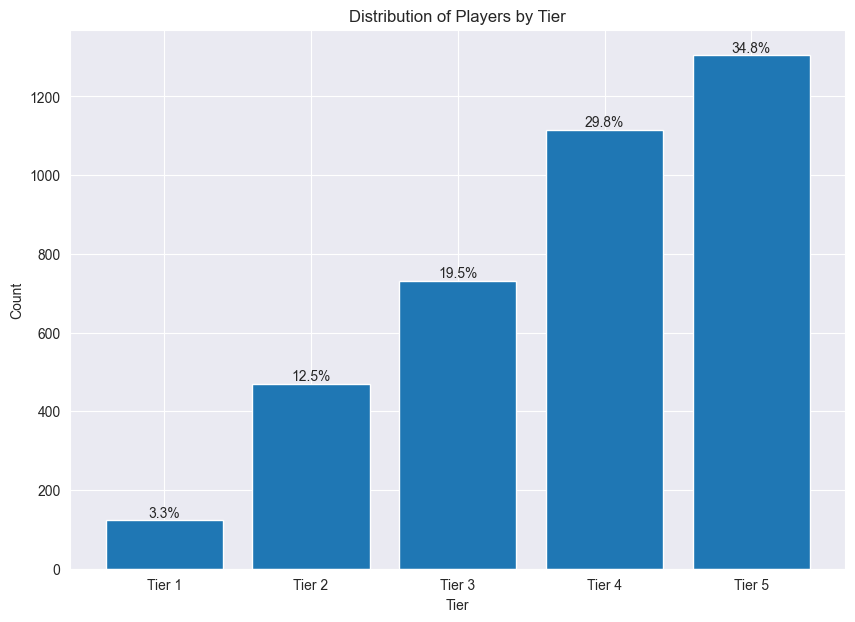

In [9]:
## Plot the tier distribution
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate counts and percentages
tier_counts = nhl_players_with_tiers['tier'].value_counts().sort_index()
tier_percentages = tier_counts / len(nhl_players_with_tiers) * 100

# Plot bar chart instead of histogram
plt.figure(figsize=(10, 7))
bars = plt.bar(tier_counts.index, tier_counts.values, tick_label=[f"Tier {i}" for i in tier_counts.index])

# Annotate with percentages
for bar, pct in zip(bars, tier_percentages):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 1, f"{pct:.1f}%",
             ha='center', va='bottom', fontsize=10)

plt.title("Distribution of Players by Tier")
plt.xlabel("Tier")
plt.ylabel("Count")
plt.show()

## Write to CSV

In [8]:
nhl_players_with_tiers.to_csv('../dataset/nhl_players_with_tiers.csv', index=False, encoding='utf-8-sig')